In [26]:
from pathlib import Path
from python.complex import complex_t
from python.util import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [27]:
# Инициализация динамической библиотеки
lib_name = "build/libAntennaArray.so"
c_lib = InitializeLibrary(lib_name)

In [28]:
# Инициализация переменных
N = int(input("Enter number of elements: "))
freq_0 = int(input("Enter frequency (in GHz): ")) * 10**9
wave_length = (constants.c) / freq_0
wave_num = 2 * np.pi / wave_length

In [29]:
# Расчет необходимых данных для расчета
theta_range = np.linspace(0, 2*np.pi, 1001)
f_arr = [complex_t(1, 0) for _ in theta_range]
delta_x = CalculateDeltaX(wave_length, np.pi / 6)
L = delta_x * (N - 1)
x_arr = np.array([(i * delta_x) - L/2 for i in range(N)])

In [30]:
# Конвертация питоновских списков/массивов в C-массив
c_theta_range = ListToCDoubleArray(theta_range)
c_f_arr = ListToCComplexArray(f_arr)
c_x_arr = ListToCDoubleArray(x_arr)

In [31]:
# Расчет диаграммы направленности
abs_rad_pattern = np.zeros_like(theta_range)
radiation_pattern = c_lib.Calculate1DAntennaArray(ct.c_int(N), ct.c_int(
    theta_range.size), c_f_arr, c_x_arr, c_theta_range, ct.c_double(wave_num))
for i in range(theta_range.size):
    abs_rad_pattern[i] = np.abs(
        radiation_pattern[i].real + 1j * radiation_pattern[i].imag)
c_lib.FreeComplexArr(radiation_pattern)

In [ ]:
# Переменные для построения графика
log_abs_rad_pattern = 20 * np.log10(abs_rad_pattern)
log_ray_width = -3
log_side_ray = -13

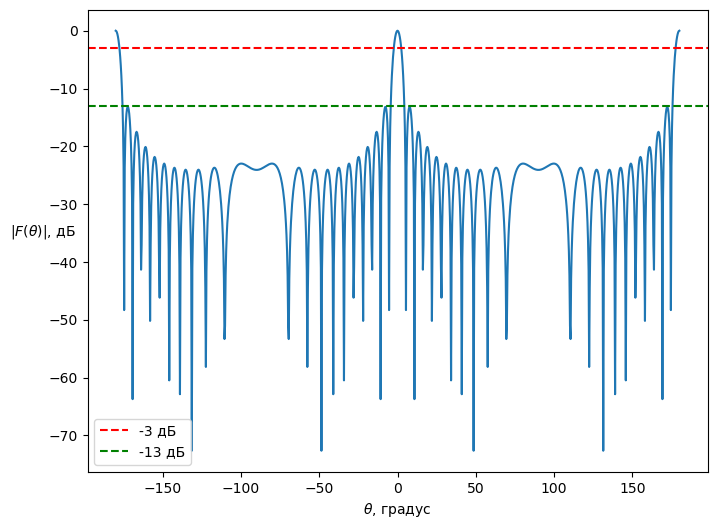

In [33]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(np.degrees(theta_range) - 180, log_abs_rad_pattern)
plt.axhline(log_ray_width, color='red', label=f"{log_ray_width} дБ", linestyle='--')
plt.axhline(log_side_ray, color='green', label=f"{log_side_ray} дБ", linestyle='--')
plt.xlabel(r"$\theta$, градус")
plt.ylabel(r"$|F(\theta)|$, дБ", rotation=0)
plt.legend()
plt.show()